Итоговая структура analysis.ipynb
Заголовок и описание проекта (Markdown).

Импорт библиотек (Code).

Загрузка данных (Code).

Предварительный анализ (Code + Markdown).

Визуализация данных (Code + Markdown).

Анализ выбросов и корреляций (Code + Markdown).

Дополнительный анализ (Code + Markdown).

Сохранение результатов (Code + Markdown).

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
stocks = pd.read_csv('../data/stocks/stock_data.csv')
cryptos = pd.read_csv('../data/cryptos/crypto_data.csv')

# Просмотр первых строк данных



In [24]:
stocks.head()

,Ticker,MSFT,MSFT.1,MSFT.2,MSFT.3,MSFT.4,GOOGL,GOOGL.1,GOOGL.2,GOOGL.3,GOOGL.4,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4
0,Price,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,152.17479468225582,154.04367229600518,151.74351748277945,153.93824768066406,22622100,67.176977721624,68.18681335449219,67.08132380627873,68.18681335449219,27278000,71.79988089307743,72.85662080131382,71.5453946624551,72.79602813720703,135480400
3,2020-01-03,151.73389977126973,153.29608187585552,151.48470640409093,152.0214080810547,21116200,67.15655543577822,68.43940351728152,67.12267404619415,67.83010864257812,23408000,72.02044674653634,72.85177641142324,71.86290728239744,72.08831024169922,146322800
4,2020-01-06,150.5454451789613,152.4814169062096,149.99915026312553,152.41432189941406,20813700,67.33738843542059,69.66345923216974,67.30600805367692,69.63805389404297,46768000,71.20606216043667,72.7014846521864,70.95399466003437,72.66270446777344,118387200


In [25]:
cryptos.head()

,Ticker,BTC-USD,BTC-USD.1,BTC-USD.2,BTC-USD.3,BTC-USD.4,SOL-USD,SOL-USD.1,SOL-USD.2,SOL-USD.3,...,ETH-USD,ETH-USD.1,ETH-USD.2,ETH-USD.3,ETH-USD.4,XRP-USD,XRP-USD.1,XRP-USD.2,XRP-USD.3,XRP-USD.4
0,Price,Open,High,Low,Close,Volume,Open,High,Low,Close,...,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,7194.89208984375,7254.33056640625,7174.9443359375,7200.17431640625,18565664997,NaN,NaN,NaN,NaN,...,129.6306610107422,132.83535766601562,129.1982879638672,130.802001953125,7935230330,0.1929119974374771,0.19436199963092804,0.19210700690746307,0.19266700744628906,1041134003
3,2020-01-02,7202.55126953125,7212.1552734375,6935.27001953125,6985.47021484375,20802083465,NaN,NaN,NaN,NaN,...,130.82003784179688,130.82003784179688,126.95491027832031,127.4101791381836,8032709256,0.19270800054073334,0.19289599359035492,0.18694700300693512,0.1880429983139038,1085351426
4,2020-01-03,6984.4287109375,7413.71533203125,6914.99609375,7344.88427734375,28111481032,NaN,NaN,NaN,NaN,...,127.41126251220703,134.55401611328125,126.49002075195312,134.1717071533203,10476845358,0.18794800341129303,0.1940699964761734,0.1858460009098053,0.19352099299430847,1270017043


Шаг 2: Предварительный анализ данных
python


In [21]:
cryptos.head()

,Ticker,BTC-USD,BTC-USD.1,BTC-USD.2,BTC-USD.3,BTC-USD.4,SOL-USD,SOL-USD.1,SOL-USD.2,SOL-USD.3,...,ETH-USD,ETH-USD.1,ETH-USD.2,ETH-USD.3,ETH-USD.4,XRP-USD,XRP-USD.1,XRP-USD.2,XRP-USD.3,XRP-USD.4
0,Price,Open,High,Low,Close,Volume,Open,High,Low,Close,...,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,7194.89208984375,7254.33056640625,7174.9443359375,7200.17431640625,18565664997,NaN,NaN,NaN,NaN,...,129.6306610107422,132.83535766601562,129.1982879638672,130.802001953125,7935230330,0.1929119974374771,0.19436199963092804,0.19210700690746307,0.19266700744628906,1041134003
3,2020-01-02,7202.55126953125,7212.1552734375,6935.27001953125,6985.47021484375,20802083465,NaN,NaN,NaN,NaN,...,130.82003784179688,130.82003784179688,126.95491027832031,127.4101791381836,8032709256,0.19270800054073334,0.19289599359035492,0.18694700300693512,0.1880429983139038,1085351426
4,2020-01-03,6984.4287109375,7413.71533203125,6914.99609375,7344.88427734375,28111481032,NaN,NaN,NaN,NaN,...,127.41126251220703,134.55401611328125,126.49002075195312,134.1717071533203,10476845358,0.18794800341129303,0.1940699964761734,0.1858460009098053,0.19352099299430847,1270017043


In [26]:
# Основная информация о данных
stocks.info()
cryptos.info()

# Описательная статистика
stocks.describe()
cryptos.describe()

# Проверка на пропуски
print("Пропуски в данных по акциям:")
print(stocks.isnull().sum())

print("Пропуски в данных по криптовалютам:")
print(cryptos.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ticker   945 non-null    object
 1   MSFT     944 non-null    object
 2   MSFT.1   944 non-null    object
 3   MSFT.2   944 non-null    object
 4   MSFT.3   944 non-null    object
 5   MSFT.4   944 non-null    object
 6   GOOGL    944 non-null    object
 7   GOOGL.1  944 non-null    object
 8   GOOGL.2  944 non-null    object
 9   GOOGL.3  944 non-null    object
 10  GOOGL.4  944 non-null    object
 11  AAPL     944 non-null    object
 12  AAPL.1   944 non-null    object
 13  AAPL.2   944 non-null    object
 14  AAPL.3   944 non-null    object
 15  AAPL.4   944 non-null    object
dtypes: object(16)
memory usage: 118.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 

Шаг 3: Визуализация данных

TypeError: 'value' must be an instance of str or bytes, not a float

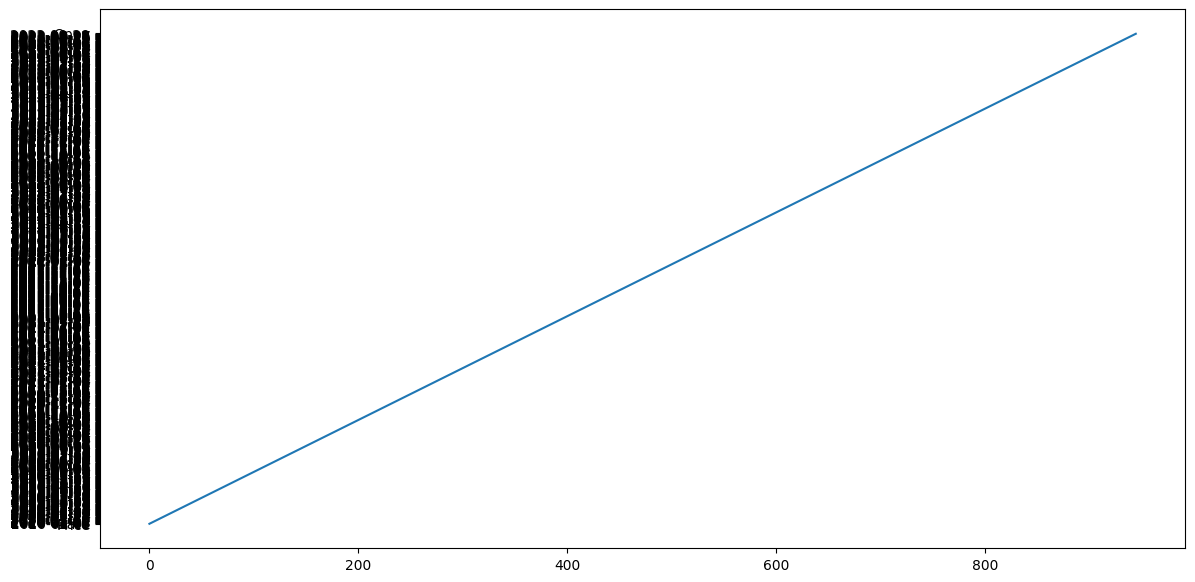

In [27]:
# Графики цен закрытия для акций
plt.figure(figsize=(14, 7))
for ticker in stocks.columns:
    plt.plot(stocks[ticker], label=ticker)
plt.title('Цены закрытия акций')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.show()

# Графики цен закрытия для криптовалют
plt.figure(figsize=(14, 7))
for ticker in cryptos.columns:
    plt.plot(cryptos[ticker], label=ticker)
plt.title('Цены закрытия криптовалют')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.show()

Шаг 4: Анализ выбросов

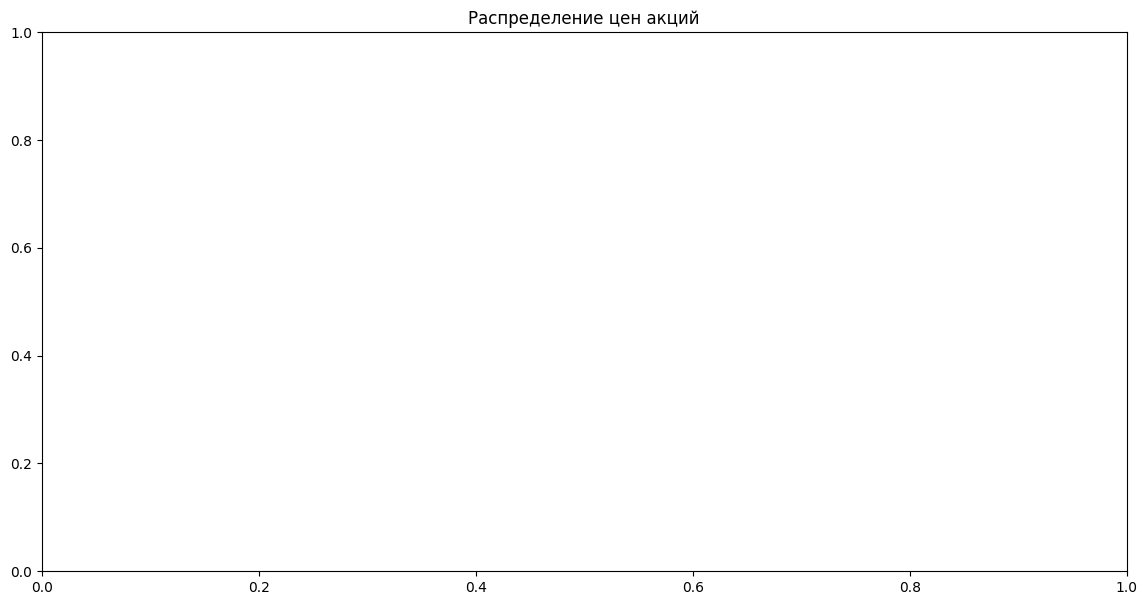

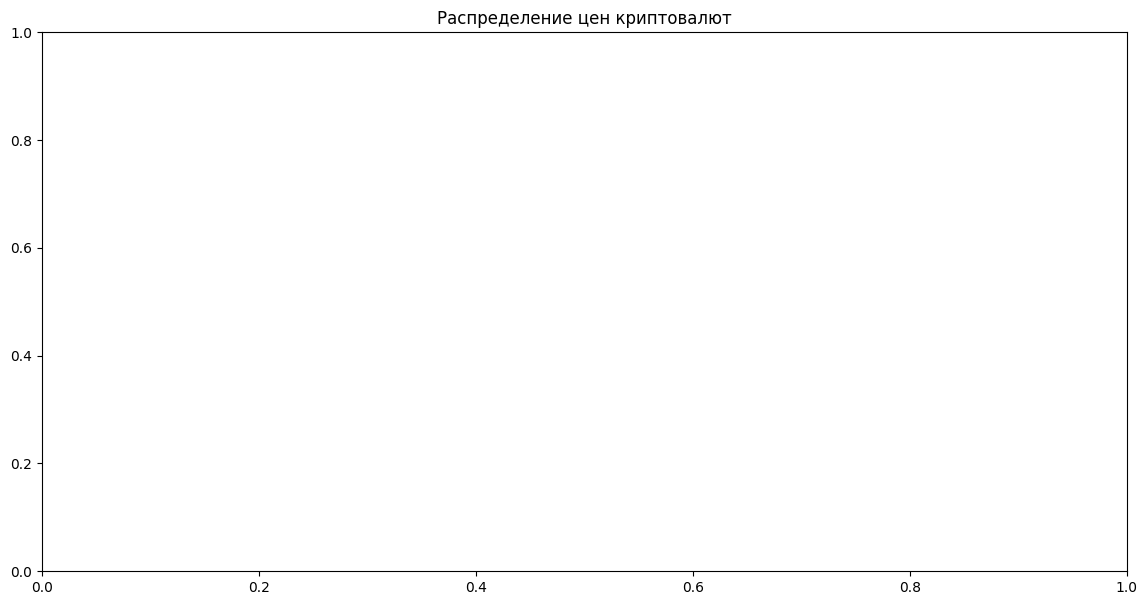

In [14]:
# Boxplot для акций
plt.figure(figsize=(14, 7))
sns.boxplot(data=stocks)
plt.title('Распределение цен акций')
plt.show()

# Boxplot для криптовалют
plt.figure(figsize=(14, 7))
sns.boxplot(data=cryptos)
plt.title('Распределение цен криптовалют')
plt.show()

Шаг 5: Анализ корреляций

In [15]:
# Матрица корреляций для акций
plt.figure(figsize=(10, 8))
sns.heatmap(stocks.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между акциями')
plt.show()

# Матрица корреляций для криптовалют
plt.figure(figsize=(10, 8))
sns.heatmap(cryptos.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между криптовалютами')
plt.show()

ValueError: could not convert string to float: 'Price'

<Figure size 1000x800 with 0 Axes>

Шаг 6: Дополнительный анализ

In [16]:
# Пример: Скользящее среднее для акций
plt.figure(figsize=(14, 7))
for ticker in stocks.columns:
    stocks[ticker].rolling(window=30).mean().plot(label=f'{ticker} (30 дней)')
plt.title('Скользящее среднее цен акций (30 дней)')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.show()

DataError: No numeric types to aggregate

<Figure size 1400x700 with 0 Axes>

Шаг 7: Сохранение результатов

TypeError: 'value' must be an instance of str or bytes, not a float

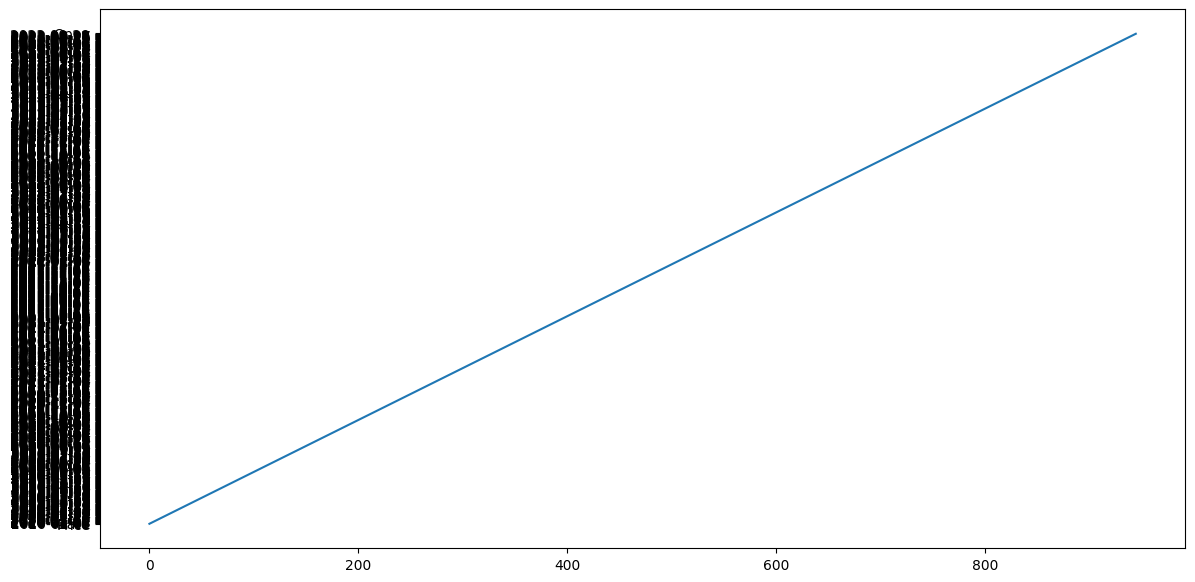

In [17]:
# Сохранение графиков
plt.figure(figsize=(14, 7))
for ticker in stocks.columns:
    plt.plot(stocks[ticker], label=ticker)
plt.title('Цены закрытия акций')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.savefig('results/stocks_prices.png')  # Сохраняем график в папку results
plt.show()